# Getting Started

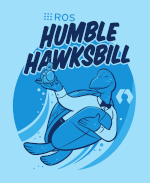

## Installation

 Instructions to set up ROS 2 for the first time at  Google Colab. This tutorial building ROS 2 (**Humble**) from source on the following platforms:


*   Ubuntu 22.04



### Check the release version of Ubuntu:

In [ ]:
!lsb_release -a

### Set Locale

Make sure you have a locale which supports UTF-8. If you are in a minimal environment (such as a docker container), the locale may be something minimal like POSIX. We test with the following settings. However, it should be fine if you’re using a different UTF-8 supported locale.

In [ ]:
!locale  # check for UTF-8

!sudo apt update && sudo apt install locales
!sudo locale-gen en_US en_US.UTF-8
!sudo update-locale LC_ALL=en_US.UTF-8 LANG=en_US.UTF-8
!export LANG=en_US.UTF-8

!locale  # verify settings

### Setup Sources

Now add the ROS 2 GPG key with apt.

In [ ]:
!sudo apt update && sudo apt install curl -y
!sudo curl -sSL https://raw.githubusercontent.com/ros/rosdistro/master/ros.key -o /usr/share/keyrings/ros-archive-keyring.gpg

Then add the repository to your sources list.

In [ ]:
!echo "deb [arch=$(dpkg --print-architecture) signed-by=/usr/share/keyrings/ros-archive-keyring.gpg] http://packages.ros.org/ros2/ubuntu $(. /etc/os-release && echo $UBUNTU_CODENAME) main" | sudo tee /etc/apt/sources.list.d/ros2.list > /dev/null

### Install ROS 2 packages

Update your apt repository caches after setting up the repositories.

In [ ]:
!sudo apt update

ROS 2 packages are built on frequently updated Ubuntu systems. It is always recommended that you ensure your system is up to date before installing new packages.

In [ ]:
!sudo apt upgrade

Desktop Install (Recommended): ROS, RViz, demos, tutorials.

In [ ]:
!sudo apt install ros-humble-desktop

ROS-Base Install (Bare Bones): Communication libraries, message packages, command line tools. No GUI tools.

In [ ]:
!sudo apt install ros-humble-ros-base

Development tools: Compilers and other tools to build ROS packages

In [ ]:
!sudo apt install ros-dev-tools

### Environment setup

Set up the extensions by installing colcon and rosdep.

In [ ]:
!sudo apt install -y python3-colcon-common-extensions python3-rosdep
!rosdep init
!rosdep update

Set up your environment by writing and sourcing the script file.

In [ ]:
with open('ros2studio', 'w') as f:
    f.write('#!/bin/bash\n')
    f.write('source /opt/ros/humble/setup.bash\n')
    f.write('exec "$@"\n')
!chmod +x ros2studio

### Try some examples

Try to run this python script.

In [ ]:
%%writefile hello.py
import rclpy
from rclpy.node import Node
import time

def main(args=None):
    rclpy.init(args=args)
    node = Node('node_hello')

    while rclpy.ok():
        node.get_logger().info('Hello ROS2Studio!')
        time.sleep(1)

    node.destroy_node()
    rclpy.shutdown()

if __name__ == '__main__':
    main()

In [ ]:
!./ros2studio python hello.py